Accuracy: 0.6710192237939789


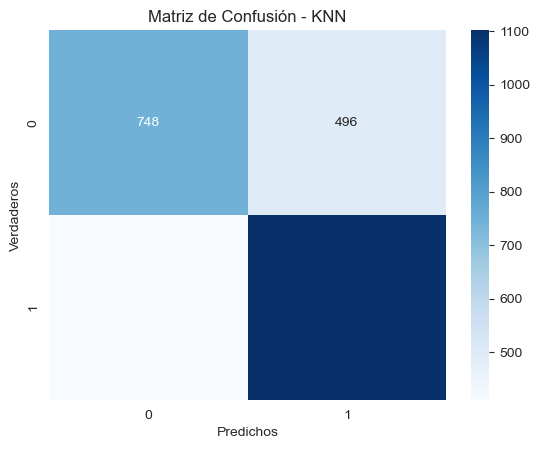

In [4]:
import json
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Carga de datos JSON
with open('arraysPartidasResultado.json') as file:
    data_results = json.load(file)

with open('caracteristicas_campeones.json') as file:
    data_champions = json.load(file)

# Transformación de los datos de campeones en diccionario
champions_features = {champ['Key']: champ for champ in data_champions}

# Cálculo de medias de características
features_to_average = ['Difficulty', 'HP', 'Armor', 'HPRegen', 'AttackDamage', 'AttackSpeed']
average_features = {feature: sum(champ[feature] for champ in champions_features.values()) / len(champions_features) for feature in features_to_average}

# Preparación de DataFrame para datos combinados
combined_data = []

for match in data_results:
    match_result = match[0]
    champion_ids = match[1:]
    match_features = []

    for champ_id in champion_ids:
        if champ_id in champions_features:
            champ_data = champions_features[champ_id]
            match_features.extend([
                champ_data['Difficulty'],
                champ_data['HP'],
                champ_data['Armor'],
                champ_data['HPRegen'],
                champ_data['AttackDamage'],
                champ_data['AttackSpeed']
            ])
        else:
            match_features.extend([average_features[feat] for feat in features_to_average])

    combined_data.append([match_result] + match_features)

column_names = ['Result'] + [f'Champ{i}_{feat}' for i in range(1, 11) for feat in features_to_average]
df_combined = pd.DataFrame(combined_data, columns=column_names)

# Dividir los datos en características y objetivo
X = df_combined.drop('Result', axis=1)
y = df_combined['Result']

# División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalado de características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Creación y entrenamiento del modelo KNN
knn_model = KNeighborsClassifier(n_neighbors=5)  # Puedes ajustar el número de vecinos aquí
knn_model.fit(X_train_scaled, y_train)

# Evaluación del modelo
y_pred = knn_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.title('Matriz de Confusión - KNN')
plt.xlabel('Predichos')
plt.ylabel('Verdaderos')
plt.show()
